<a href="https://colab.research.google.com/github/tonpiplaifa/KKU_data_mining/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate Data

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X,y = make_blobs(n_samples=100,centers=3,n_features=2,random_state=6)

In [ ]:
X.shape

(100, 2)

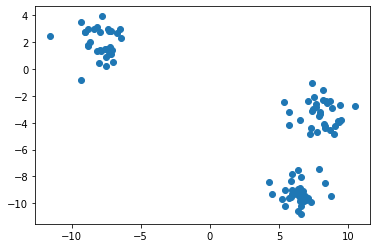

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

##import

In [ ]:
from sklearn.cluster import  KMeans

##Define

In [ ]:
KMClust = KMeans(n_clusters=2)

In [ ]:
##ลองกำหนดห้ากลุ่ม
#KMClust = KMeans(n_clusters=5)

##Train

In [ ]:
KMClust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Predict


In [ ]:
label = KMClust.predict(X)

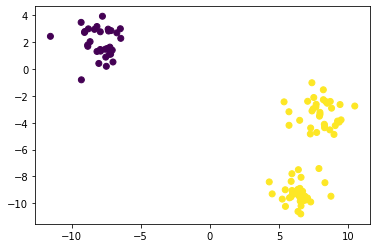

In [ ]:
plt.scatter(X[:,0],X[:,1],c=label)

##Color quantization

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
path = '/content/drive/My Drive'

In [37]:
import cv2
import os

In [38]:
img = cv2.imread(os.path.join(path,"d.jpg"))

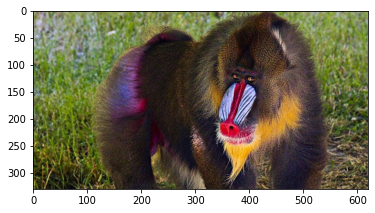

In [39]:
RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [41]:
RGB_img.shape

(330, 620, 3)

##count unique colors

In [42]:
import numpy as np

In [43]:
np.unique(RGB_img).shape

(256,)

## Use K-mean to reduce colors from 330 colors to 8 


In [48]:
#Define
myQuantize = KMeans(n_clusters=8)


In [45]:
#Train
myQuantize.fit(RGB_img)

ValueError: ignored

In [24]:
###### รวมให้เหลือมิติเดียว #####

In [50]:
img_row = np.reshape(RGB_img,(330*620, 3))
img_row ##(2100*1400, 3 แก้ตามขนาดรูป)

array([[158, 168, 108],
       [159, 168, 111],
       [149, 155, 107],
       ...,
       [103,  87,  53],
       [111,  97,  60],
       [ 82,  68,  29]], dtype=uint8)

In [51]:
#Train ใหม่
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
#Predict
res = myQuantize.predict(img_row)

In [54]:
res

array([3, 3, 3, ..., 5, 5, 2], dtype=int32)

## Get cluster centers

In [55]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 35.19252284,  25.77393347,  24.42728883],
       [125.70869225, 134.59369917,  74.98129631],
       [ 66.54489834,  53.75607116,  41.72387989],
       [147.4795382 , 152.95155981, 118.76492262],
       [ 94.59813676, 107.36039255,  34.56173119],
       [103.86720679,  79.31635802,  77.47835648],
       [181.48816445, 178.57765781, 194.53633721],
       [218.08214416, 154.20709843,  65.18733992]])

## Map cplor name back to img

In [58]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [59]:
new_img_ = new_img/255

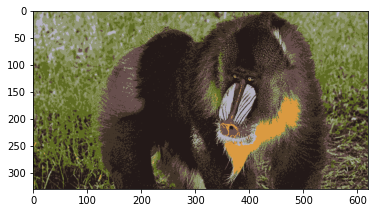

In [60]:
plt.imshow(new_img_)